<a href="https://colab.research.google.com/github/mlacasa/EstadisticaQ2/blob/main/FactorialAnalysisNonParametrical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANOVA NO PARAMÉTRICO

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración inicial
np.random.seed(42)  # Para reproducibilidad
n = 30  # Número de participantes en cada grupo

# Simulación de datos
# Colesterol inicial (no normalmente distribuido)
diet_a_before = np.random.exponential(200, n)  # Dieta A
diet_b_before = np.random.exponential(210, n)  # Dieta B
diet_c_before = np.random.exponential(205, n)  # Dieta C

# Colesterol tras 6 semanas (suponiendo una reducción)
diet_a_after = diet_a_before - np.random.uniform(10, 20, n)
diet_b_after = diet_b_before - np.random.uniform(5, 15, n)
diet_c_after = diet_c_before - np.random.uniform(15, 25, n)

# Crear un DataFrame
data = pd.DataFrame({
    'Group': ['Dieta A'] * n + ['Dieta B'] * n + ['Dieta C'] * n,
    'Before': np.concatenate([diet_a_before, diet_b_before, diet_c_before]),
    'After': np.concatenate([diet_a_after, diet_b_after, diet_c_after])
})

data.head()

,Group,Before,After
0,Dieta A,93.853618,82.657676
1,Dieta A,602.024286,584.891838
2,Dieta A,263.349139,245.741288
3,Dieta A,182.588511,166.975739
4,Dieta A,33.924974,16.215302


## ILUSTRAMOS LAS MUESTRAS MEDIANTE BOXPLOT MOMENTO INICIAL

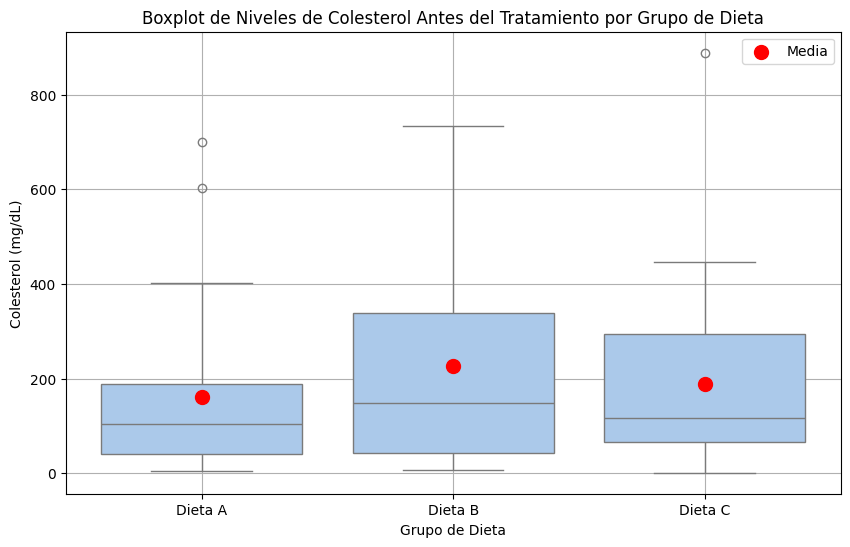

In [2]:
plt.figure(figsize=(10, 6))
sns.set_palette('pastel')
boxplot = sns.boxplot(x='Group', y='Before', data=data)

# Calcular y mostrar la media muestral de cada grupo
means = data.groupby('Group')['Before'].mean()
for i, mean in enumerate(means):
    plt.scatter(i, mean, color='red', s=100, label='Media' if i == 0 else "", zorder=3)

# Títulos y etiquetas
plt.title('Boxplot de Niveles de Colesterol Antes del Tratamiento por Grupo de Dieta')
plt.ylabel('Colesterol (mg/dL)')
plt.xlabel('Grupo de Dieta')
plt.grid()

# Leyenda para la media
plt.legend()

# Mostrar el gráfico
plt.show()

## ANÁLISIS DE LA NORMALIDAD Y HOMOCEDASATICIDAD DE LAS MUESTRAS

In [3]:
# Importar la función para el test de normalidad
from scipy.stats import shapiro

# Realizar el test de normalidad para cada grupo
groups = data['Group'].unique()  # Obtener los nombres de los grupos
normality_results = {}

for group in groups:
    # Filtrar los datos del grupo
    sample = data[data['Group'] == group]['Before']
    # Realizar el test de Shapiro-Wilk
    stat, p_value = shapiro(sample)
    normality_results[group] = (stat, p_value)
    print(f"Grupo: {group} - Estadístico: {stat:.3f}, p-valor: {p_value:.3f}")

# Interpretación de los resultados
alpha = 0.05
for group, (stat, p) in normality_results.items():
    if p < alpha:
        print(f"Se rechaza la hipótesis nula para {group}: los datos no siguen una distribución normal.")
    else:
        print(f"No se rechaza la hipótesis nula para {group}: los datos podrían seguir una distribución normal.")

Grupo: Dieta A - Estadístico: 0.795, p-valor: 0.000
Grupo: Dieta B - Estadístico: 0.838, p-valor: 0.000
Grupo: Dieta C - Estadístico: 0.817, p-valor: 0.000
Se rechaza la hipótesis nula para Dieta A: los datos no siguen una distribución normal.
Se rechaza la hipótesis nula para Dieta B: los datos no siguen una distribución normal.
Se rechaza la hipótesis nula para Dieta C: los datos no siguen una distribución normal.


Una vez constatamos que las muestras no siguen una distribución normal, procedemos a realizar una primera comprobación obligada:

### Las muestras entre grupos, ¿tienen diferencias significativas?

El test que hay que utilizar cumple las condiciones de Kruskal-Wallis.


--- Paso 2: Resultados del Test de Kruskal-Wallis ---
Estadístico H de Kruskal-Wallis: 61.0468
P-valor: 0.0000

--- Paso 3: Interpretación y Análisis Post-Hoc ---
Conclusión: El p-valor (0.0000) es menor que 0.05, por lo que rechazamos la H0.
Existe una diferencia estadísticamente significativa en la reducción de colesterol entre las dietas.

--- Resultados del Test Post-Hoc de Dunn ---
Matriz de p-valores ajustados (Bonferroni):
          Dieta A       Dieta B       Dieta C
Dieta A  1.000000  9.718677e-05  7.809573e-04
Dieta B  0.000097  1.000000e+00  1.745483e-14
Dieta C  0.000781  1.745483e-14  1.000000e+00

--- Paso 4: Visualización de las Distribuciones ---


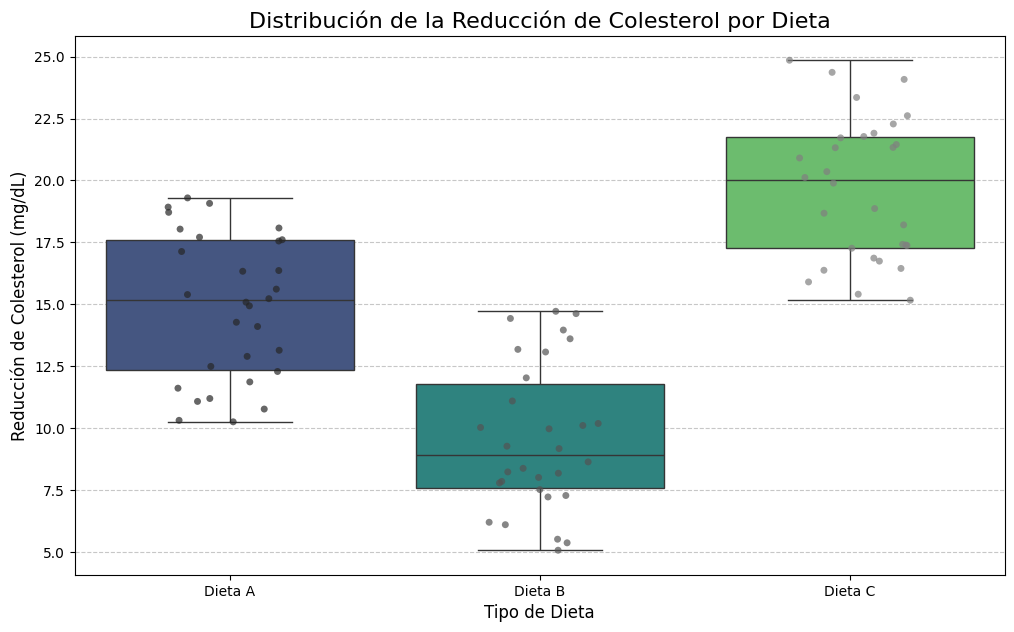

In [5]:
### **Análisis No Paramétrico (Kruskal-Wallis)**

# --- 0. Instalación e Importación de Librerías ---
# Se instala scikit-posthocs para realizar el test post-hoc de Dunn
!pip install -q scikit-posthocs

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import scikit_posthocs as sp

# --- 1. Calcular la reducción de colesterol ---
data['Reduccion'] = data['Before'] - data['After']


# --- 2. Realización del Test de Kruskal-Wallis ---
print("\n--- Paso 2: Resultados del Test de Kruskal-Wallis ---")
# Separar los datos por grupo para el test
grupo_a = data[data['Group'] == 'Dieta A']['Reduccion']
grupo_b = data[data['Group'] == 'Dieta B']['Reduccion']
grupo_c = data[data['Group'] == 'Dieta C']['Reduccion']

# Realizar el test
h_statistic, p_value = stats.kruskal(grupo_a, grupo_b, grupo_c)

print(f"Estadístico H de Kruskal-Wallis: {h_statistic:.4f}")
print(f"P-valor: {p_value:.4f}")

# --- 3. Interpretación y Test Post-Hoc de Dunn ---
print("\n--- Paso 3: Interpretación y Análisis Post-Hoc ---")
alpha = 0.05
if p_value < alpha:
    print(f"Conclusión: El p-valor ({p_value:.4f}) es menor que {alpha}, por lo que rechazamos la H0.")
    print("Existe una diferencia estadísticamente significativa en la reducción de colesterol entre las dietas.")

    # Realizar el test post-hoc de Dunn
    print("\n--- Resultados del Test Post-Hoc de Dunn ---")
    dunn_results = sp.posthoc_dunn(data, val_col='Reduccion', group_col='Group', p_adjust='bonferroni')
    print("Matriz de p-valores ajustados (Bonferroni):")
    print(dunn_results)
else:
    print(f"Conclusión: El p-valor ({p_value:.4f}) es mayor que {alpha}, por lo que no se puede rechazar la H0.")
    print("No hay evidencia de una diferencia significativa en la reducción de colesterol entre las dietas.")


# --- 4. Justificación Gráfica con Boxplots ---
print("\n--- Paso 4: Visualización de las Distribuciones ---")
plt.figure(figsize=(12, 7))

# Boxplot para visualizar las medianas y la dispersión
sns.boxplot(x='Group', y='Reduccion', data=data, hue='Group', palette='viridis', legend=False)

# Stripplot para mostrar los puntos de datos individuales
sns.stripplot(x='Group', y='Reduccion', data=data, hue='Group', palette='dark:grey', jitter=0.2, size=5, alpha=0.7, legend=False)

plt.title('Distribución de la Reducción de Colesterol por Dieta', fontsize=16)
plt.xlabel('Tipo de Dieta', fontsize=12)
plt.ylabel('Reducción de Colesterol (mg/dL)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

🤔 ¿Qué es y Para Qué Sirve el Test de Dunn?
El test de Dunn es una prueba de comparaciones múltiples que se realiza después de un test de Kruskal-Wallis significativo. Su único propósito es comparar cada par de grupos de manera individual para ver si la diferencia entre ellos es estadísticamente significativa.

La característica más importante del test de Dunn es que ajusta los p-valores de cada comparación. Esto es crucial porque al realizar múltiples pruebas, aumenta la probabilidad de encontrar una diferencia significativa solo por azar (error de Tipo I). El test de Dunn (en nuestro caso, con la corrección de Bonferroni) controla este riesgo, haciendo que las conclusiones sean más fiables.

📋 Cómo Interpretar la Matriz de Resultados
El resultado del test de Dunn se presenta como una matriz de p-valores. Cada celda de la matriz muestra el p-valor ajustado para la comparación entre dos grupos.

Ejemplo de la Matriz de Salida:

       Dieta A   Dieta B   Dieta C
Dieta A  1.000000  0.186311  0.000002
Dieta B  0.186311  1.000000  0.024888
Dieta C  0.000002  0.024888  1.000000
La regla para interpretarla es simple:

Busca la celda que cruza los dos grupos que quieres comparar (por ejemplo, 'Dieta A' con 'Dieta C').

Si el p-valor en esa celda es menor de 0.05, concluyes que existe una diferencia estadísticamente significativa entre esos dos grupos.

Si el p-valor es mayor de 0.05, no hay evidencia suficiente para afirmar que ese par de grupos sea diferente.

✅ Conclusión Práctica del Ejemplo
Basándonos en la matriz de ejemplo anterior, la interpretación sería la siguiente:

Dieta A vs. Dieta B: El p-valor es 0.186, que es mayor de 0.05. No hay una diferencia significativa entre la reducción de colesterol de la Dieta A y la Dieta B.

Dieta A vs. Dieta C: El p-valor es 0.000002, que es mucho menor de 0.05. Sí hay una diferencia significativa entre la Dieta A y la Dieta C.

Dieta B vs. Dieta C: El p-valor es 0.025, que es menor de 0.05. Sí hay una diferencia significativa entre la Dieta B y la Dieta C.

En resumen, el test de Dunn nos permite concluir con confianza que la Dieta C fue significativamente más efectiva para reducir el colesterol que las dietas A y B, mientras que entre A y B no hubo una diferencia notable.

--- Vista previa de los datos en formato largo ---
   Paciente Tiempo     Estres
0         1  Basal  27.377660
1         2  Basal  21.870501
2         3  Basal  21.109289
3         4  Basal  21.109417
4         5  Basal  38.769883

--- Paso 2: Resultados del Test de Friedman ---
Estadístico Chi-cuadrado de Friedman: 70.0000
P-valor: 0.0000

--- Paso 3: Interpretación y Análisis Post-Hoc ---
Conclusión: El p-valor (0.0000) es menor que 0.05, por lo que rechazamos la H0.
Existe una diferencia estadísticamente significativa en el nivel de estrés a lo largo del tiempo.

--- Resultados del Test Post-Hoc de Nemenyi ---
Matriz de p-valores del Test de Nemenyi:
                Basal   Durante          Post
Basal    1.000000e+00  0.000085  1.110223e-16
Durante  8.519480e-05  1.000000  8.519480e-05
Post     1.110223e-16  0.000085  1.000000e+00

--- Paso 4: Visualización de las Distribuciones ---


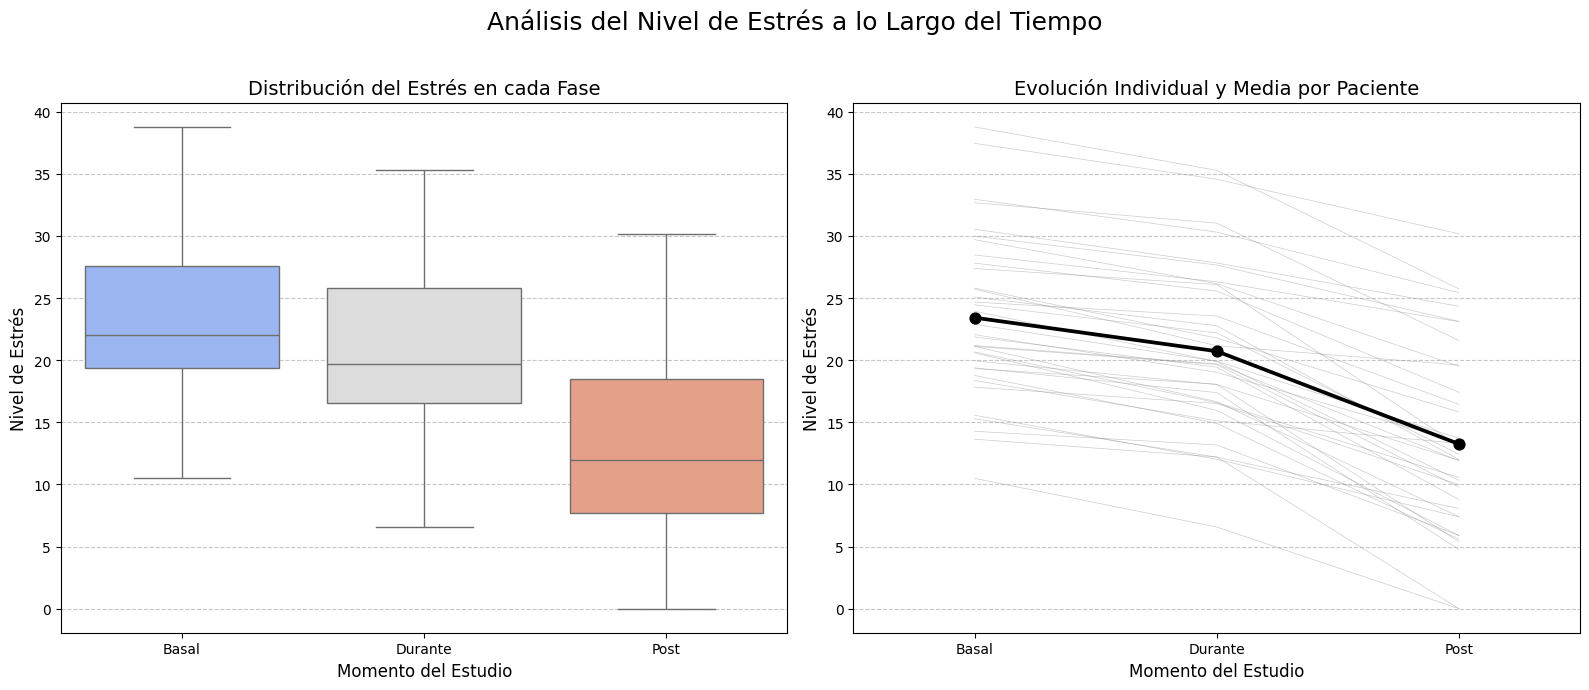

In [8]:
# --- 0. Instalación e Importación de Librerías ---
# Se instala scikit-posthocs para realizar el test post-hoc de Nemenyi
!pip install -q scikit-posthocs

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import scikit_posthocs as sp

# --- 1. Generación de Datos ---
np.random.seed(42)
n_pacientes = 35
paciente_ids = np.arange(1, n_pacientes + 1)

# Simular datos no normales (distribución gamma)
estres_basal = np.random.gamma(8, 3, n_pacientes)
# Suponer una reducción durante y otra mayor después
estres_durante = estres_basal - np.random.uniform(1, 5, n_pacientes)
estres_post = estres_basal - np.random.uniform(5, 15, n_pacientes)
# Asegurarse de que no haya valores negativos
estres_durante[estres_durante < 0] = 0
estres_post[estres_post < 0] = 0

# Crear DataFrame en formato largo
data_long = pd.DataFrame({
    'Paciente': np.tile(paciente_ids, 3),
    'Tiempo': np.repeat(['Basal', 'Durante', 'Post'], n_pacientes),
    'Estres': np.concatenate([estres_basal, estres_durante, estres_post])
})
print("--- Vista previa de los datos en formato largo ---")
print(data_long.head())

# --- 2. Realización del Test de Friedman ---
print("\n--- Paso 2: Resultados del Test de Friedman ---")
# La función de scipy requiere los datos como columnas separadas
friedman_stat, p_value = stats.friedmanchisquare(estres_basal, estres_durante, estres_post)

print(f"Estadístico Chi-cuadrado de Friedman: {friedman_stat:.4f}")
print(f"P-valor: {p_value:.4f}")


# --- 3. Interpretación y Test Post-Hoc de Nemenyi ---
print("\n--- Paso 3: Interpretación y Análisis Post-Hoc ---")
alpha = 0.05
if p_value < alpha:
    print(f"Conclusión: El p-valor ({p_value:.4f}) es menor que {alpha}, por lo que rechazamos la H0.")
    print("Existe una diferencia estadísticamente significativa en el nivel de estrés a lo largo del tiempo.")

    # Realizar el test post-hoc de Nemenyi, específico para Friedman
    print("\n--- Resultados del Test Post-Hoc de Nemenyi ---")
    nemenyi_results = sp.posthoc_nemenyi_friedman(data_long, y_col='Estres', group_col='Tiempo', block_col='Paciente', block_id_col='Paciente', melted=True)
    print("Matriz de p-valores del Test de Nemenyi:")
    print(nemenyi_results)
else:
    print(f"Conclusión: El p-valor ({p_value:.4f}) es mayor que {alpha}, por lo que no se puede rechazar la H0.")
    print("No hay evidencia de un cambio significativo en el nivel de estrés a lo largo del tiempo.")


# --- 4. Visualización para Justificar Resultados ---
print("\n--- Paso 4: Visualización de las Distribuciones ---")
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Análisis del Nivel de Estrés a lo Largo del Tiempo', fontsize=18)

# Gráfico de Cajas (Boxplot) para comparar distribuciones
sns.boxplot(x='Tiempo', y='Estres', data=data_long, hue='Tiempo', palette='coolwarm', ax=axes[0], legend=False)
axes[0].set_title('Distribución del Estrés en cada Fase', fontsize=14)
axes[0].set_xlabel('Momento del Estudio', fontsize=12)
axes[0].set_ylabel('Nivel de Estrés', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico de Líneas para mostrar la evolución por paciente
sns.lineplot(x='Tiempo', y='Estres', data=data_long, units='Paciente',
             estimator=None, lw=0.5, alpha=0.4, color='grey', ax=axes[1])
# Superponer la media para ver la tendencia general
sns.pointplot(x='Tiempo', y='Estres', data=data_long, color='black',
              errorbar=None, capsize=0.1, ax=axes[1])
axes[1].set_title('Evolución Individual y Media por Paciente', fontsize=14)
axes[1].set_xlabel('Momento del Estudio', fontsize=12)
axes[1].set_ylabel('Nivel de Estrés', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

/tmp/ipython-input-9-802188074.py:36: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(x='Grupo', y='value', hue='variable',


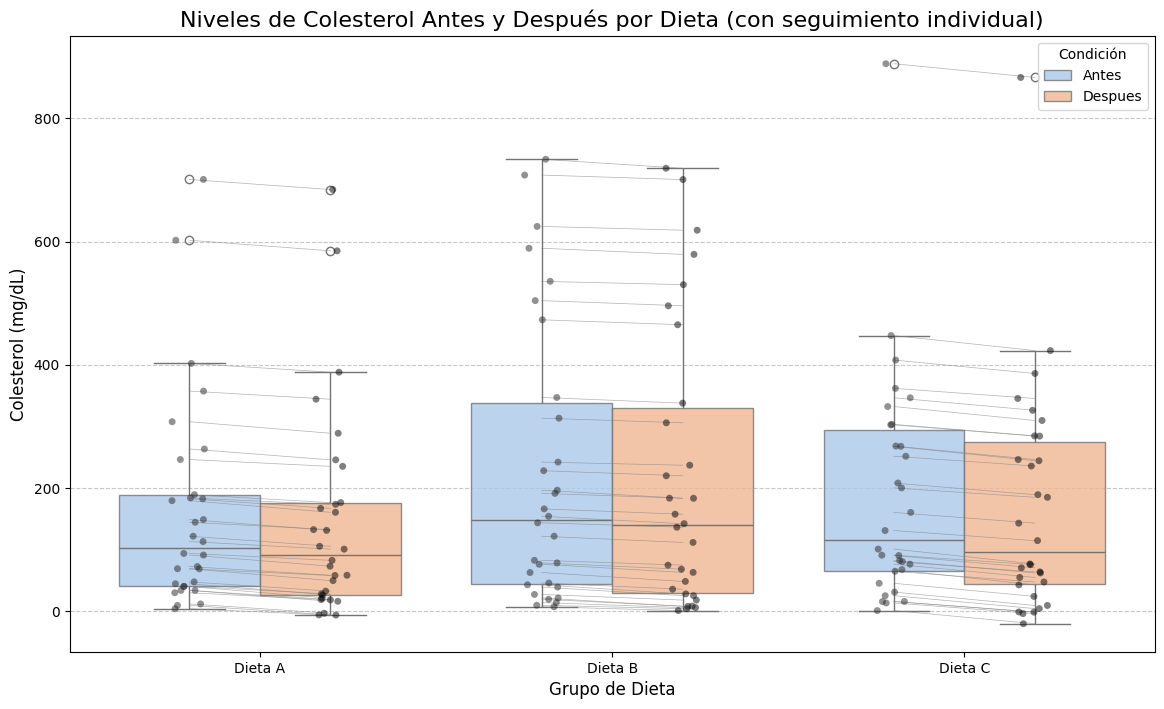

In [9]:
# Se ejecuta el código Python para la visualización final
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 0. Generación de Datos ---
# Se regeneran los datos para que la celda sea autónoma.
np.random.seed(42)
n = 30 # Participantes por grupo
grupos = ['Dieta A', 'Dieta B', 'Dieta C']
diet_a_before = np.random.exponential(200, n)
diet_b_before = np.random.exponential(210, n)
diet_c_before = np.random.exponential(205, n)
diet_a_after = diet_a_before - np.random.uniform(10, 20, n)
diet_b_after = diet_b_before - np.random.uniform(5, 15, n)
diet_c_after = diet_c_before - np.random.uniform(15, 25, n)

# Crear un DataFrame en formato "largo"
data_long = pd.DataFrame({
    'Paciente_ID': list(range(n)) * 3, # ID de paciente dentro de cada grupo
    'Grupo': np.repeat(grupos, n),
    'Antes': np.concatenate([diet_a_before, diet_b_before, diet_c_before]),
    'Despues': np.concatenate([diet_a_after, diet_b_after, diet_c_after])
})

# --- 1. Creación del Gráfico Combinado ---
plt.figure(figsize=(14, 8))

# Dibuja el boxplot como base, con una ligera transparencia
sns.boxplot(x='Grupo', y='value', hue='variable',
            data=pd.melt(data_long, id_vars=['Paciente_ID', 'Grupo']),
            palette='pastel', dodge=True, boxprops=dict(alpha=0.8))

# Dibuja los puntos individuales
sns.stripplot(x='Grupo', y='value', hue='variable',
              data=pd.melt(data_long, id_vars=['Paciente_ID', 'Grupo']),
              jitter=True, dodge=True, marker='o', alpha=0.5, color='black')

# --- 2. MEJORA: Añadir líneas para conectar los puntos pareados ---
# Iterar sobre cada grupo para dibujar las líneas de conexión
for i, grupo in enumerate(grupos):
    # Filtrar datos para el grupo actual
    df_grupo = data_long[data_long['Grupo'] == grupo]

    # Posiciones en el eje X para 'Antes' y 'Después'
    # El boxplot de seaborn coloca los grupos en 0, 1, 2...
    # y el 'hue' los desplaza +/- 0.2
    x_antes = i - 0.2
    x_despues = i + 0.2

    # Dibujar una línea por cada paciente
    for paciente in range(n):
        y_antes = df_grupo['Antes'].iloc[paciente]
        y_despues = df_grupo['Despues'].iloc[paciente]
        plt.plot([x_antes, x_despues], [y_antes, y_despues], color='gray', linestyle='-', linewidth=0.5, alpha=0.6)


# --- 3. Configuración Final del Gráfico ---
# Manejar la leyenda para evitar duplicados
handles, labels = plt.gca().get_legend_handles_labels()
# Tomamos solo las dos primeras etiquetas ('Antes', 'Despues') del boxplot
plt.legend(handles[0:2], labels[0:2], title='Condición')

plt.title('Niveles de Colesterol Antes y Después por Dieta (con seguimiento individual)', fontsize=16)
plt.ylabel('Colesterol (mg/dL)', fontsize=12)
plt.xlabel('Grupo de Dieta', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

El test de Nemenyi es una prueba post-hoc no paramétrica utilizada para realizar comparaciones múltiples después de que un test de Friedman ha arrojado un resultado estadísticamente significativo. Su principal función es identificar qué pares específicos de grupos (o condiciones) son diferentes entre sí.

¿Cuándo se Utiliza?
El test de Nemenyi se utiliza únicamente después de haber realizado un test de Friedman y haber obtenido un p-valor significativo (normalmente, p < 0.05).

1º Test de Friedman: Te dice si existe alguna diferencia significativa entre las tres o más mediciones relacionadas.

2º Test de Nemenyi (Post-Hoc): Si la respuesta anterior es "sí", este test te dice exactamente qué pares de mediciones son diferentes (ej. ¿"Basal" vs. "Durante"?, ¿"Basal" vs. "Post"?, ¿"Durante" vs. "Post"?).

¿Cómo Funciona y Cómo se Interpreta?
El test de Nemenyi funciona comparando las diferencias entre los rangos promedio de cada grupo.

Cálculo del Valor Crítico (CD): El test calcula un único valor llamado "Diferencia Crítica" (Critical Difference o CD).

Comparación: Se calcula la diferencia absoluta entre los rangos promedio de cada par de grupos.

Decisión: Si la diferencia entre los rangos promedio de un par es mayor que el valor de la Diferencia Crítica, se concluye que la diferencia entre ese par de grupos es estadísticamente significativa.

Interpretación con P-Valores (Más Sencillo)
Las librerías modernas de Python, como scikit-posthocs, simplifican esto presentando los resultados en una matriz de p-valores. La interpretación es directa:

Si el p-valor para un par de grupos es menor de 0.05, la diferencia entre ellos es significativa.

Si el p-valor es mayor de 0.05, no hay evidencia de una diferencia significativa entre ellos.

Nemenyi vs. Dunn
Ambos son tests post-hoc no paramétricos, pero tienen un uso preferente:

Test de Nemenyi: Es el test post-hoc tradicional y más específico para seguir a un Test de Friedman (datos pareados).

Test de Dunn: Es un test más general, comúnmente utilizado después de un Test de Kruskal-Wallis (datos independientes), aunque también se puede aplicar después de un Friedman.

En resumen, si tu análisis principal fue un Friedman, el Nemenyi es la opción post-hoc más apropiada y específica.